In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# List Down the Categories

In [4]:
train_path = ".//Vegetable//train"
image_categories = os.listdir(train_path)
image_categories

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

# Give Sample Images

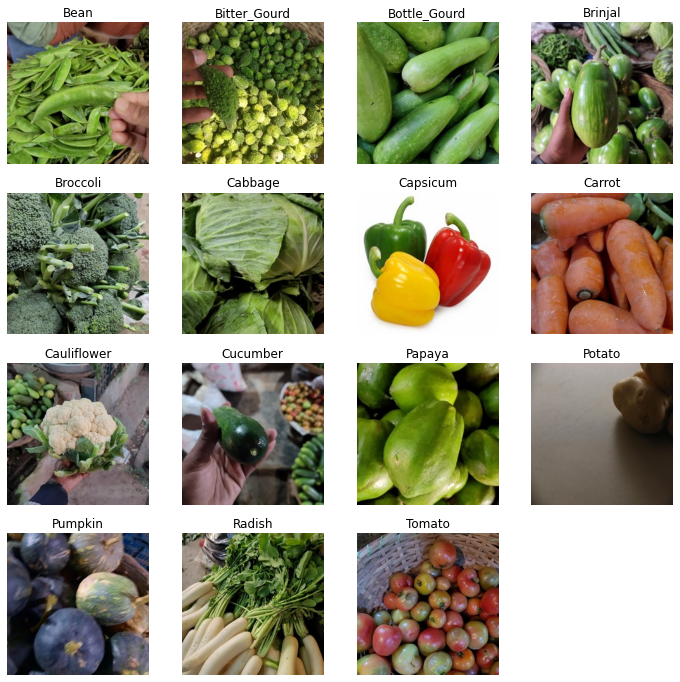

In [5]:
# Let's plot a few images
train_path = ".//Vegetable//train"
validation_path = ".//Vegetable//validation"
test_path = ".//Vegetable//test"

image_categories = os.listdir(train_path)

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, category in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = os.path.join(train_path, category)
        images_inside = os.listdir(image_path)
        random_image = images_inside[5]
        random_image_path = os.path.join(image_path, random_image)
        img = image.load_img(random_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()
    return img_arr

# Call the function
arr = plot_images(image_categories)
        

In [6]:
print("shape of an image : ",arr.shape)

shape of an image :  (224, 224, 3)


# Prepare the Dataset

In [7]:
# Creating Image Data Generator for train, validation and test set

# 1. Training set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Testing set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [8]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
import pandas as pd
cat = pd.DataFrame()
# cat['Class'] = list(class_map.keys())
cat['Map'] = list(class_map.values())
print(cat)

             Map
0           Bean
1   Bitter_Gourd
2   Bottle_Gourd
3        Brinjal
4       Broccoli
5        Cabbage
6       Capsicum
7         Carrot
8    Cauliflower
9       Cucumber
10        Papaya
11        Potato
12       Pumpkin
13        Radish
14        Tomato


# Build a Fully Connected Neural Network


In [9]:
model_ANN = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [224, 224, 3]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(15, activation = 'softmax')
])

# print the model summary
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 70)                7070      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 15)                315       
                                                                 
Total params: 15,064,855
Trainable params: 15,064,855
No

In [10]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model_ANN.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist_ANN = model_ANN.fit(train_image_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/10
468/468 [==============================] - 116s 243ms/step - loss: 3.0247 - accuracy: 0.2174 - val_loss: 2.0879 - val_accuracy: 0.3236
Epoch 2/10
468/468 [==============================] - 105s 224ms/step - loss: 1.9205 - accuracy: 0.3731 - val_loss: 1.7524 - val_accuracy: 0.4005
Epoch 3/10
468/468 [==============================] - 151s 323ms/step - loss: 1.6348 - accuracy: 0.4567 - val_loss: 1.6782 - val_accuracy: 0.4425
Epoch 4/10
468/468 [==============================] - 144s 308ms/step - loss: 1.5141 - accuracy: 0.4977 - val_loss: 1.5801 - val_accuracy: 0.4862
Epoch 5/10
468/468 [==============================] - 112s 239ms/step - loss: 1.3619 - accuracy: 0.5478 - val_loss: 1.3372 - val_accuracy: 0.5578
Epoch 6/10
468/468 [==============================] - 98s 210ms/step - loss: 1.2716 - accuracy: 0.5807 - val_loss: 1.4502 - val_accuracy: 0.5262
Epoch 7/10
468/468 [==============================] - 104s 223ms/step - loss: 1.1715 - accuracy: 0.6177 - val_loss: 1.2278 - 

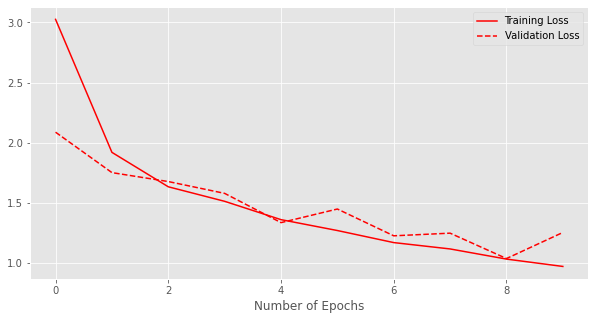

In [11]:
# Plot the error and accuracy
h = hist_ANN.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

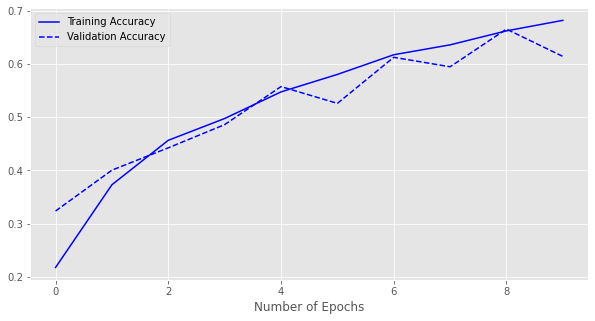

In [12]:
# Plot the error and accuracy
h = hist_ANN.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

# Building a CNN model

In [29]:
# Build a custom sequential CNN model
def CNN_model():
    model = Sequential() # model object

    # Add Layers
    model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[224, 224, 3]))
    model.add(MaxPooling2D(2, ))
    model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(2))

    # Flatten the feature map
    model.add(Flatten())

    # Add the fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(15, activation='softmax'))

    # print the model summary
    model.summary()
    return model

model_CNN = CNN_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [31]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model_CNN.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist_CNN = model_CNN.fit(train_image_generator, 
                 epochs=5, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/5
468/468 [==============================] - 966s 2s/step - loss: 1.3837 - accuracy: 0.5542 - val_loss: 0.5257 - val_accuracy: 0.8350
Epoch 2/5
468/468 [==============================] - 813s 2s/step - loss: 0.5735 - accuracy: 0.8159 - val_loss: 0.4490 - val_accuracy: 0.8572
Epoch 3/5
468/468 [==============================] - 820s 2s/step - loss: 0.3469 - accuracy: 0.8862 - val_loss: 0.2864 - val_accuracy: 0.9153
Epoch 4/5
468/468 [==============================] - 814s 2s/step - loss: 0.2345 - accuracy: 0.9274 - val_loss: 0.3745 - val_accuracy: 0.8938
Epoch 5/5
468/468 [==============================] - 814s 2s/step - loss: 0.1843 - accuracy: 0.9410 - val_loss: 0.2935 - val_accuracy: 0.9194


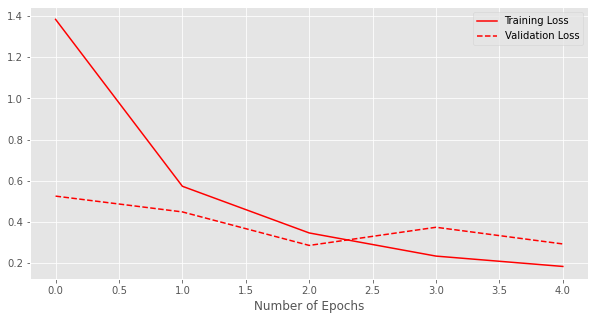

In [32]:
# Plot the error and accuracy
h = hist_CNN.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

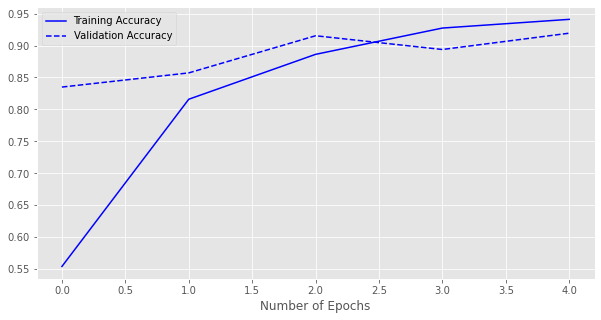

In [33]:
# Plot the error and accuracy
h = hist_CNN.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [34]:
# Predict the accuracy for the test set
model_CNN.evaluate(test_image_generator)

94/94 [==============================] - 72s 768ms/step - loss: 0.2851 - accuracy: 0.9200


[0.2851378619670868, 0.9200000166893005]

1/1 [==============================] - 0s 42ms/step


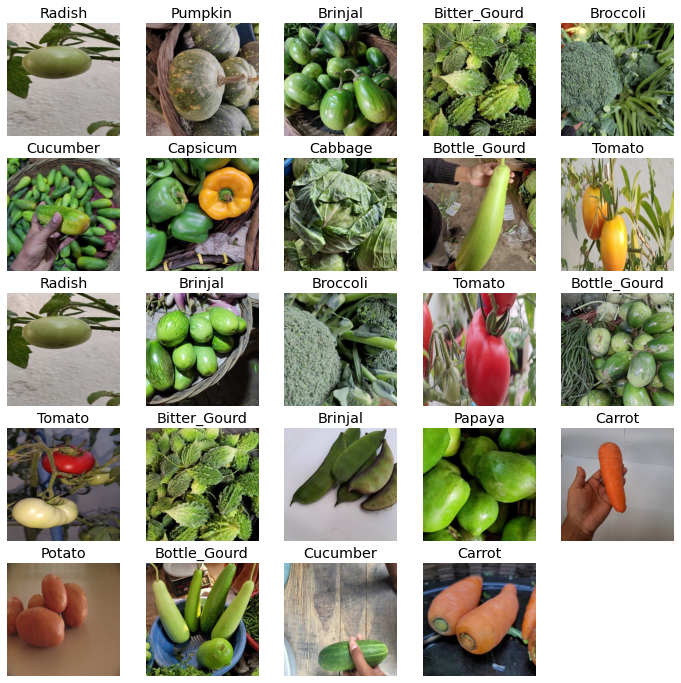

In [37]:
import random
def generate_predictions(model, external = None):
    
    if external:
        plt.figure(figsize=(5, 5))
        img = image.load_img(external,target_size=(224, 224))
        img_arr = image.img_to_array(img)/255.0
        img_arr_test = img_arr.reshape((1, 224, 224, 3))
        predicted_label = np.argmax(model.predict(img_arr_test))
        predicted_vegetable = class_map[predicted_label]
        plt.imshow(img_arr)
        plt.title(predicted_vegetable)
        plt.axis('off')
        return

    plt.figure(figsize=(12, 12))
    for i in range(24):
        test_image_path = './Vegetable/test'
        import random
        category = class_map[random.randint(0, 14)]
        file = os.listdir(os.path.join(test_image_path, category))[random.randint(0, 100)]
        image_path = os.path.join(test_image_path, category, str(file))
        img = image.load_img(image_path)
        img_arr = image.img_to_array(img)/255.0
        img_arr_test = img_arr.reshape((1, img_arr.shape[0], img_arr.shape[1], img_arr.shape[2]))
        predicted_label = np.argmax(model.predict(img_arr_test))
        predicted_vegetable = class_map[predicted_label]
        # Create Subplot and plot the images
        plt.subplot(5, 5, i+1)
        plt.imshow(img_arr)
        plt.title(predicted_vegetable)
        plt.axis('off')
        
    plt.show()

generate_predictions(model_CNN)

# Transfer Learning

In [38]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input

IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction =  Dense(15, activation='softmax')(x)

model_ins = Model(inputs=inception.input, outputs=prediction)

model_ins.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


87910968/87910968 [==============================] - 26s 0us/step


In [39]:
r = model_ins.fit_generator(
  train_image_generator,
  validation_data=test_image_generator,
  epochs=3,
  steps_per_epoch=15000//32,
  validation_steps=3000//32
)

Epoch 1/3
468/468 [==============================] - 797s 2s/step - loss: 0.2157 - accuracy: 0.9367 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 2/3
468/468 [==============================] - 804s 2s/step - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 3/3
468/468 [==============================] - 800s 2s/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0354 - val_accuracy: 0.9872


In [40]:
# Predict the accuracy for the test set
model_ins.evaluate(test_image_generator)

94/94 [==============================] - 128s 1s/step - loss: 0.0352 - accuracy: 0.9873


[0.03519103303551674, 0.987333357334137]

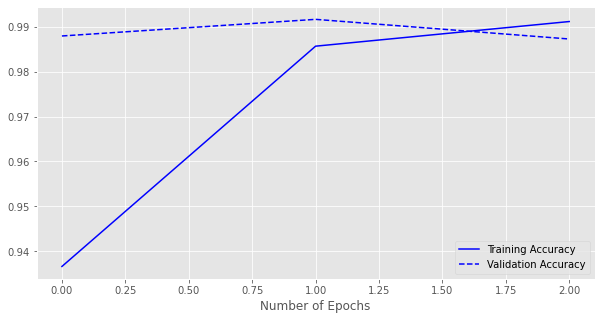

In [43]:
# Plot the error and accuracy
h = r.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

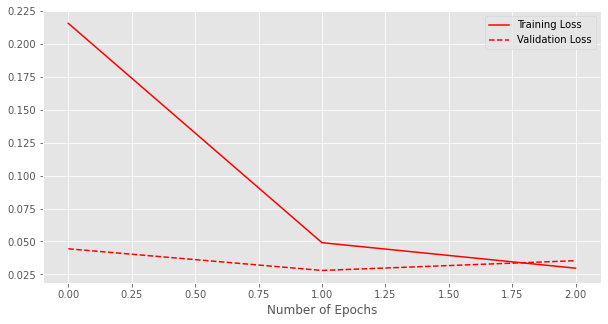

In [44]:
# Plot the error and accuracy
h = r.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 75ms/step


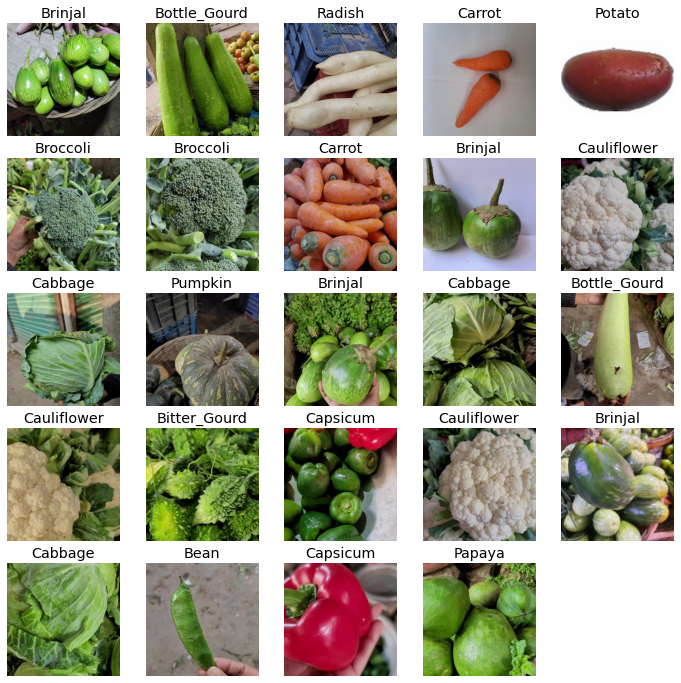

In [45]:
generate_predictions(model_ins)